

# Introdução e Metadados

### Contexto e Fontes de Dados

Os dados foram obtidos a partir da plataforma [Kaggle](https://www.kaggle.com/), em um dataset público compilado por Yash Dev Laddha.

- **Fonte Principal:** [Uber Ride Analytics Dashboard](https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard)
- **Nota sobre a Fonte:** Este é um conjunto de dados compilado e simulado para o ano de 2024, focado especificamente em fornecer um cenário rico para a criação de dashboards e análises de BI.

### Sobre a Uber (A Perspectiva do Motorista)

A Uber é uma plataforma de tecnologia que atua como principal intermediária entre passageiros e motoristas parceiros. Para os motoristas, a plataforma não é apenas um aplicativo, mas sua principal ferramenta de trabalho e fonte de renda. Entender a dinâmica das corridas é essencial para otimizar seus ganhos e seu tempo.

### Sobre o Dataset e Estrutura

O dataset descreve a atividade de quase 150.000 corridas realizadas na Índia, e nossa análise irá extrair métricas-chave para o motorista. As informações abrangem quatro áreas principais:

- **Métricas de Rentabilidade:** `Booking Value` (valor da corrida), `Ride Distance` (distância percorrida) e `Vehicle Type` (tipo de carro, que impacta o custo).
- **Métricas de Esforço e Tempo:** `Avg VTAT` (tempo de espera *não pago* até o cliente), `Avg CTAT` (duração da viagem) e `Time` (para identificar horários de pico).
- **Métricas de Risco (Cancelamentos):** `Booking Status` (status da corrida) e, crucialmente, `Reason for cancelling by Customer` e `Reason for cancelling by Driver`.
- **Métricas de Reputação:** `Driver Ratings` (avaliação do motorista) e `Customer Rating` (avaliação do cliente).


# Analytics - Camada Raw

Este notebook realiza a análise exploratória dos dados brutos da Uber, identificando padrões, outliers e insights para orientar o processo de limpeza na camada Silver.


## Configuração e Carregamento dos Dados


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
# Carregar dados da camada Raw
import os

csv_path = 'ncr_ride_bookings.csv'
if not os.path.exists(csv_path):
    csv_path = os.path.join('Data Layer', 'raw', 'ncr_ride_bookings.csv')

print(f"Carregando dados de: {csv_path}")
df = pd.read_csv(csv_path)

print(f"\nTotal de registros: {len(df):,}")
print(f"Total de colunas: {len(df.columns)}")
print("\nPrimeiras linhas:")
df.head()

Carregando dados de: ncr_ride_bookings.csv

Total de registros: 150,000
Total de colunas: 21

Primeiras linhas:

Total de registros: 150,000
Total de colunas: 21

Primeiras linhas:


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [45]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


## Análise Exploratória Inicial

### Visualização dos Dados

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

### Informações do Dataset

In [47]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

### Análise de Qualidade dos Dados

In [48]:
df.duplicated(subset='Booking ID').sum()

np.int64(1233)

In [49]:
# Configurações visuais
sns.set(style="whitegrid", palette="husl")

## Preparação para Análises Visuais

In [50]:
# Converter colunas de data e hora
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

# Criar colunas adicionais
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()

# Filtrar apenas corridas concluídas
completed = df[df['Booking Status'] == 'Completed']

/tmp/ipykernel_41056/2333160025.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



## Demanda de corridas por hora

Neste gráfico, observa-se que os horários de maior demanda são às 10h e às 18h, indicando dois períodos de pico bem definidos ao longo do dia. Esses resultados estão alinhados, em parte, com os horários de pico típicos na Índia, que geralmente ocorrem entre 8h e 9h pela manhã e entre 17h e 20h à noite, quando há maior movimentação de pessoas indo e voltando do trabalho. Embora o pico das 10h apareça ligeiramente fora do intervalo matinal tradicional, ele pode estar associado a deslocamentos tardios, compromissos comerciais iniciando mais tarde ou mesmo ao aumento da demanda por corridas curtas dentro da cidade após o trânsito mais intenso da manhã.

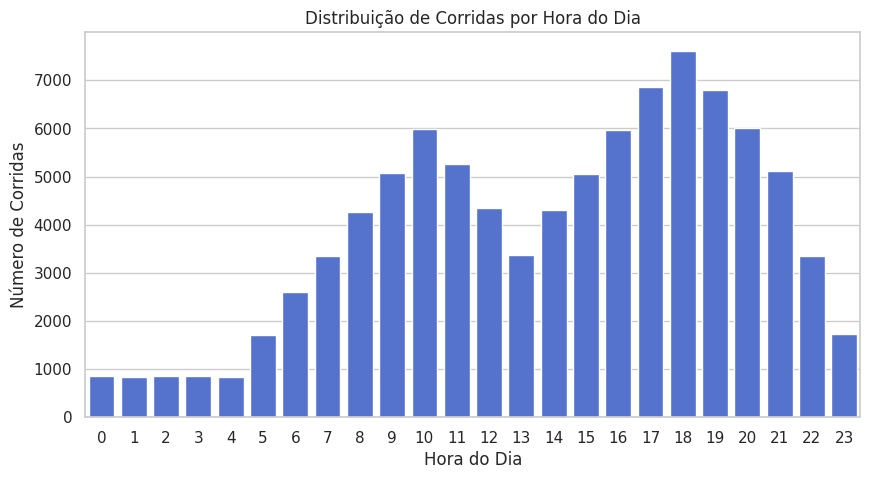

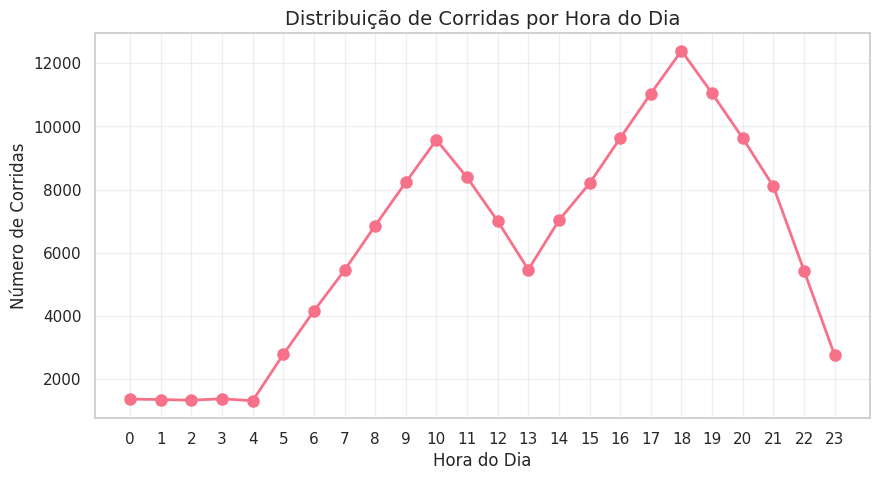

In [51]:
# === 1. Demanda por hora ===
plt.figure(figsize=(10,5))
sns.countplot(data=completed, x='Hour', color='royalblue')
plt.title('Distribuição de Corridas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Corridas')
plt.xticks(range(0, 24))
plt.show()

hourly_bookings = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(list(hourly_bookings.index), list(hourly_bookings.values),
         marker='o', linewidth=2, markersize=8)
plt.title('Distribuição de Corridas por Hora do Dia', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Corridas')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

## Demanda por dia da semana

Neste gráfico, não é possível observar uma variação significativa no número de corridas ao longo dos dias da semana. Esse comportamento pode indicar uma limitação ou viés na geração do dataset. Ainda assim, para fins desta análise, consideraremos esses resultados como representativos dos dados disponíveis, interpretando-os como uma distribuição equilibrada da demanda entre os dias da semana.

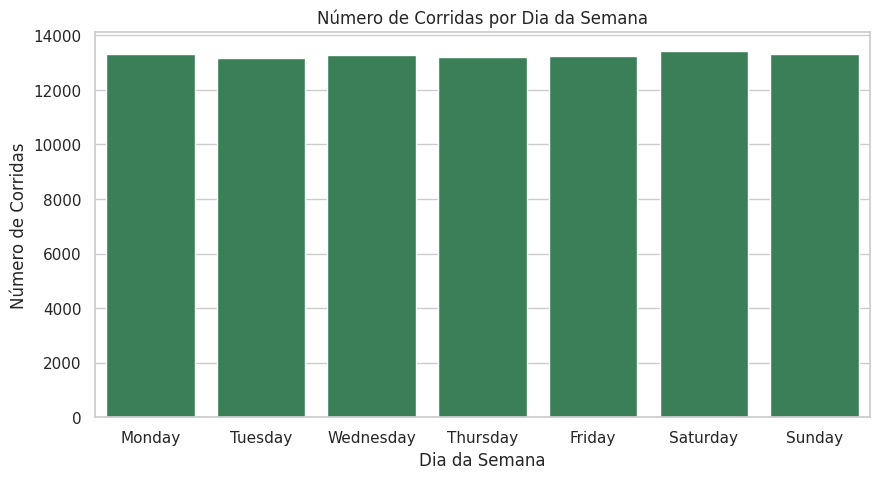

In [52]:

# === 2. Demanda por dia da semana ===
plt.figure(figsize=(10,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=completed, x='DayOfWeek', order=order, color='seagreen')
plt.title('Número de Corridas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Corridas')
plt.show()

## Locais com o maior número de partidas

A partir deste gráfico, é possível identificar os 10 principais locais com maior número de partidas. Com base nessas informações, podemos orientar os motoristas a iniciarem suas atividades nos pontos com maior demanda, aumentando as chances de conseguir corridas rapidamente e potencializando sua eficiência e ganhos ao longo do dia.

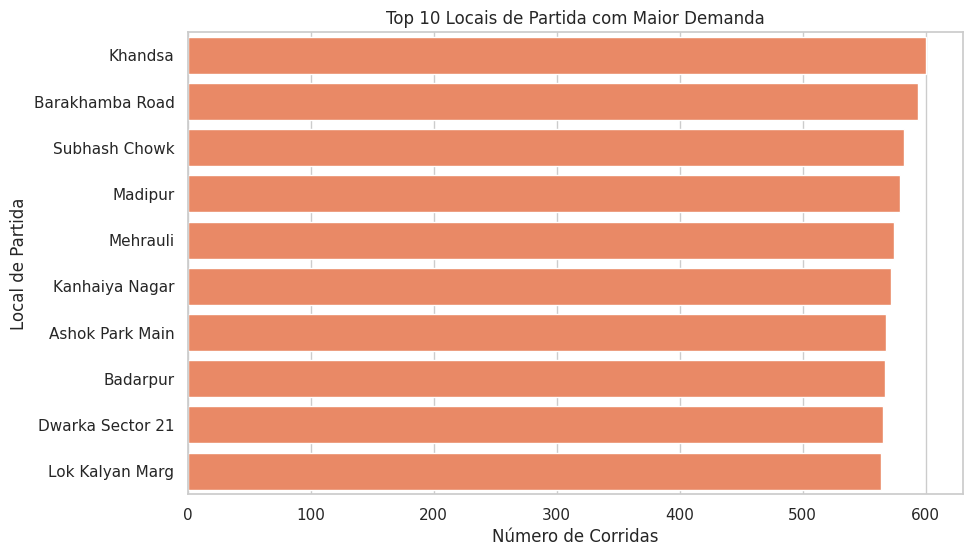

In [53]:
# === 3. Locais com maior número de partidas ===
plt.figure(figsize=(10,6))
top_pickups = completed['Pickup Location'].value_counts().head(10)
sns.barplot(x=top_pickups.values, y=top_pickups.index, color='coral')
plt.title('Top 10 Locais de Partida com Maior Demanda')
plt.xlabel('Número de Corridas')
plt.ylabel('Local de Partida')
plt.show()

## Identificação de Outliers

Foram identificados 3.127 outliers na coluna Booking Value. A maior parte das corridas são curtas ou médias, custando normalmente até 1.400 rupias indianas (aproximadamente R$87). No entanto, algumas corridas mais longas ultrapassam 4.000 rupias indianas (cerca de R$250). Apesar de esses valores se distanciarem da média, eles ainda são plausíveis para corridas longas, indicando que os outliers não representam erros de registro, mas sim casos excepcionais de viagens extensas.

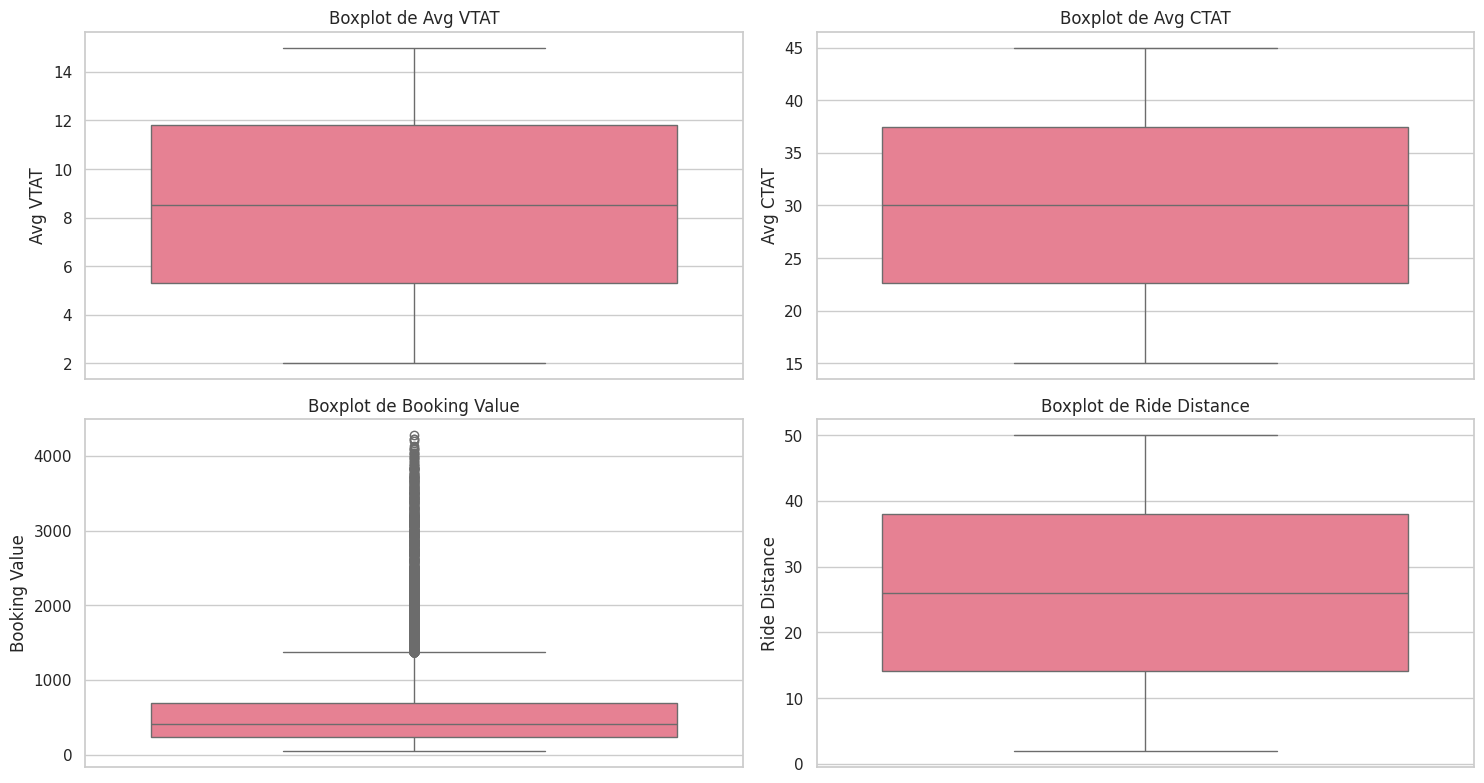

In [54]:
# Colunas numéricas relevantes
numeric_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance']

# Criar boxplots para identificar visualmente outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=completed[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [55]:
outliers = {}
for col in numeric_cols:
    Q1 = completed[col].quantile(0.25)
    Q3 = completed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = completed[(completed[col] < lower_bound) | (completed[col] > upper_bound)][col]
    print(f"{col}: {len(outliers[col])} outliers")

Avg VTAT: 0 outliers
Avg CTAT: 0 outliers
Booking Value: 3127 outliers
Ride Distance: 0 outliers


# Análise dos Status de Corridas

A análise dos status de corridas mostra que a maioria das viagens (≈62%) é concluída, enquanto os 38% restantes não são finalizados — com cancelamentos pelo motorista (~18%), cancelamentos pelo cliente (~10%), ausência de motorista (~7%) e reservas incompletas (~3%) — apontando oportunidades de melhoria na redução de cancelamentos e no aumento da disponibilidade de motoristas em horários e locais de maior demanda.


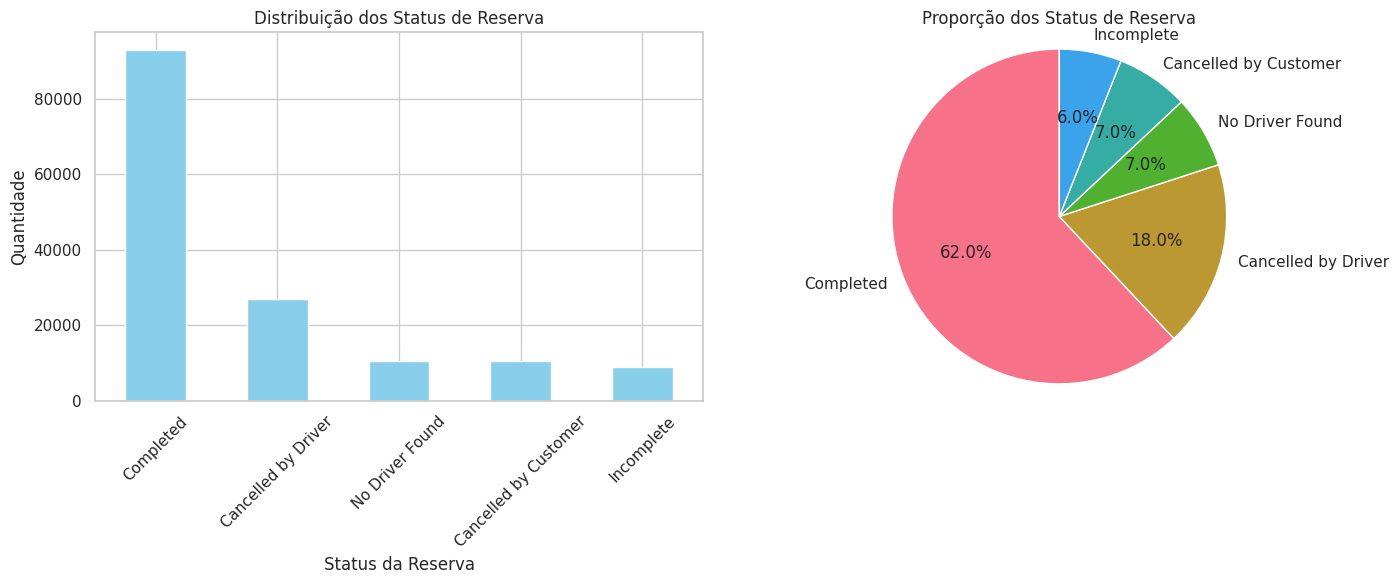

In [56]:
status_counts = df['Booking Status'].value_counts()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

status_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribuição dos Status de Reserva')
ax1.set_xlabel('Status da Reserva')
ax1.set_ylabel('Quantidade')
ax1.tick_params(axis='x', rotation=45)

ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proporção dos Status de Reserva')
ax2.axis('equal')

plt.tight_layout()
plt.show()

# Análise por Tipo de Veículo

A distribuição por tipo de veículo mostra que os Autos dominam claramente (≈37.419 reservas), seguidos por Go Mini (≈29.806) e Go Sedan (≈27.141); Bike (≈22.517) e Premier Sedan (≈18.111) têm participação relevante, enquanto eBike (≈10.557) e Uber XL (≈4.449) representam segmentos menores. Esses resultados sugerem priorizar alocação de frota e recrutamento para Auto, Go Mini e Go Sedan, manter oferta estratégica de Bikes e Premier em horários/zonas de maior demanda e considerar incentivos ou posicionamento específico para aumentar a utilização de eBikes e Uber XL.

In [57]:
# Análise por tipo de veículo
vehicle_counts = df['Vehicle Type'].value_counts()

# Gráfico interativo com Plotly
fig = px.bar(x=vehicle_counts.index, y=vehicle_counts.values,
             title='Distribuição por Tipo de Veículo',
             labels={'x': 'Tipo de Veículo', 'y': 'Quantidade de Reservas'},
             color=vehicle_counts.values,
             color_continuous_scale='viridis')
fig.show()

# Análise de Rotas Mais Populares

A análise das rotas mais populares revela que a rota DLF City Court → Bhiwadi lidera com aproximadamente 17 viagens, seguida por Janakpuri → Faridabad Sector 15 e Akshardham → RK Puram com cerca de 16 viagens cada. O dataset apresenta alta fragmentação, com milhares de rotas únicas e grande quantidade de rotas com apenas uma viagem, indicando que as top 10 rotas representam uma concentração muito baixa do total de viagens. Esse padrão sugere um comportamento altamente diversificado dos usuários, com poucas rotas recorrentes, o que dificulta a previsibilidade de demanda por trajeto específico, mas reforça a importância de manter cobertura ampla e disponibilidade de motoristas distribuída geograficamente em vez de concentrada em corredores fixos.

In [58]:
# Análise de rotas mais populares
df['Route'] = df['Pickup Location'] + ' → ' + df['Drop Location']
top_routes = df['Route'].value_counts().head(20)

print(f"\nTotal de rotas únicas: {df['Route'].nunique()}")
print(f"Rotas com apenas 1 viagem: {(df['Route'].value_counts() == 1).sum()}")
print(f"Concentração: As top 10 rotas representam {(top_routes.head(10).sum() / len(df) * 100):.2f}% das viagens")

# Gráfico das rotas mais populares
fig = px.bar(x=top_routes.values, y=top_routes.index, orientation='h',
             title='Top 20 Rotas Mais Populares',
             labels={'x': 'Número de Viagens', 'y': 'Rota (Origem → Destino)'},
             color=top_routes.values,
             color_continuous_scale='viridis')
fig.update_layout(height=700, yaxis={'categoryorder':'total ascending'})
fig.show()


Total de rotas únicas: 30564
Rotas com apenas 1 viagem: 1167
Concentração: As top 10 rotas representam 0.10% das viagens


# Análise de Horários de Pico por Local de Origem

A análise dos padrões horários nos Top 5 locais de origem revela comportamentos distintos de demanda ao longo do dia, com todos os locais apresentando picos acentuados entre 17h e 19h — horário típico de retorno do trabalho. Khandsa e Pragati Maidan lideram com picos de aproximadamente 82-84 viagens às 18h, enquanto Barakhamba Road, Saket e Badarpur apresentam picos similares entre 75-78 viagens no mesmo período. Durante as madrugadas (0h-5h) e horários noturnos tardios (22h-23h), todos os locais apresentam demanda muito baixa (5-15 viagens), indicando pouca atividade noturna. Interessantemente, há um pico secundário moderado entre 9h-10h (50-65 viagens), especialmente em Pragati Maidan e Badarpur, sugerindo deslocamentos matinais. 

Considerando os dias da semana, a análise mostra que a demanda permanece relativamente estável ao longo da semana, com pequenas variações. No entanto, o melhor dia para operar pode ser identificado pelos dados, permitindo aos motoristas priorizarem dias específicos quando necessário. Esses padrões permitem aos motoristas otimizar sua alocação geográfica ao longo do dia: posicionar-se em Khandsa, Pragati Maidan e Barakhamba Road durante os horários de pico vespertino (17h-19h), aproveitar a demanda matinal (9h-11h) em locais corporativos como Barakhamba Road e Pragati Maidan, e considerar pausas ou reposicionamento estratégico durante as janelas de baixa demanda (13h-15h e pós-20h).

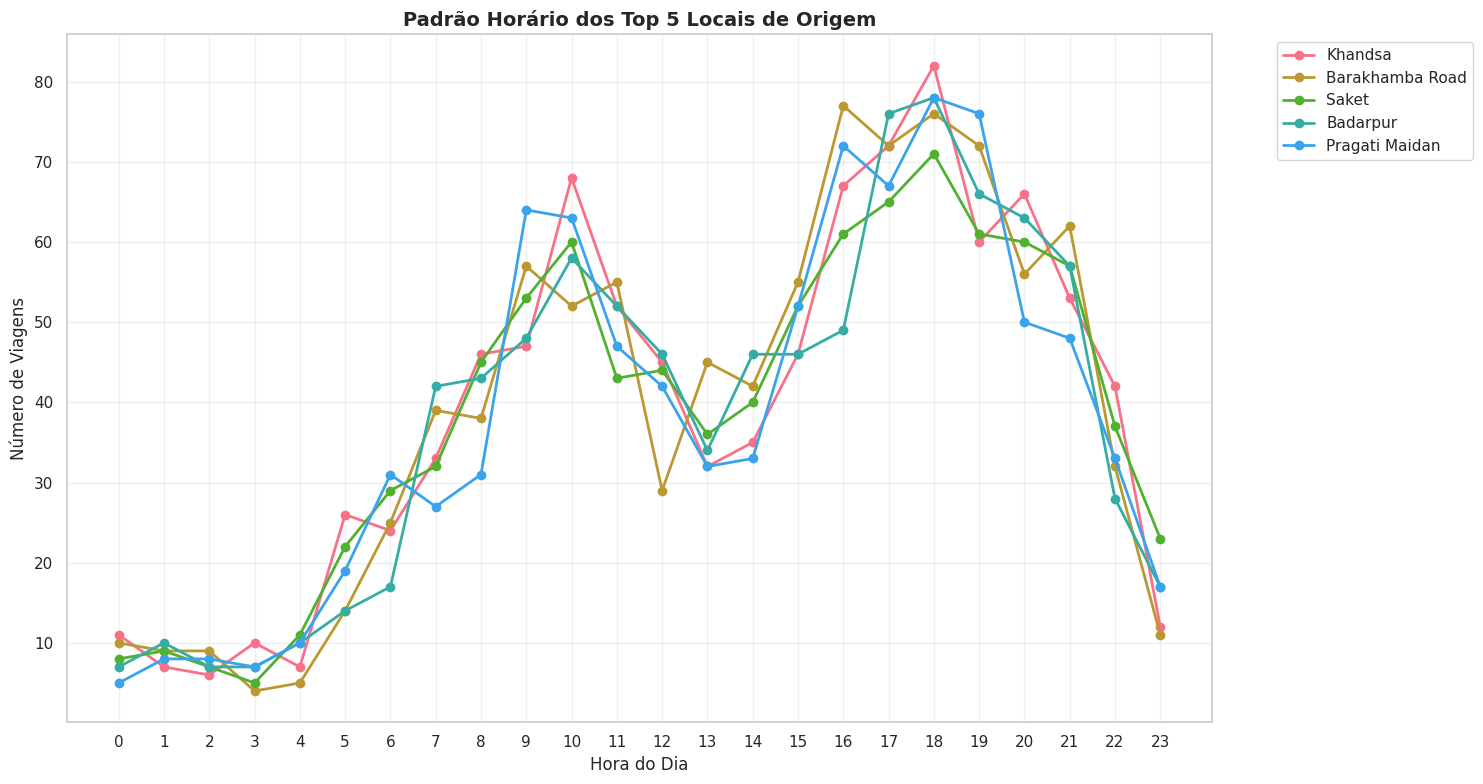


Horários de pico por local (Top 5):
Khandsa: Pico às 18h com 82 viagens
Barakhamba Road: Pico às 16h com 77 viagens
Saket: Pico às 18h com 71 viagens
Badarpur: Pico às 18h com 78 viagens
Pragati Maidan: Pico às 18h com 78 viagens


In [59]:
# Horários de pico por local de origem
pickup_hour = df.groupby(['Pickup Location', 'Hour']).size().reset_index(name='Count')
top_pickup_locations = df['Pickup Location'].value_counts().head(5).index

plt.figure(figsize=(15, 8))
for location in top_pickup_locations:
    location_data = (
        pickup_hour[pickup_hour['Pickup Location'] == location]
        .set_index('Hour')
        .reindex(range(24), fill_value=0)
        .reset_index()
    )
    
    # Converte explicitamente para arrays 1D (evita erro do Matplotlib 3.9+)
    x = location_data['Hour'].to_numpy()
    y = location_data['Count'].to_numpy()
    
    plt.plot(x, y, marker='o', label=location, linewidth=2)

plt.title('Padrão Horário dos Top 5 Locais de Origem', fontsize=14, fontweight='bold')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Viagens')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Identificar horários de pico por local
print("\nHorários de pico por local (Top 5):")
for location in top_pickup_locations:
    location_hourly = df[df['Pickup Location'] == location]['Hour'].value_counts().sort_index()
    if not location_hourly.empty:
        peak_hour = location_hourly.idxmax()
        peak_count = location_hourly.max()
        print(f"{location}: Pico às {peak_hour}h com {peak_count} viagens")
    else:
        print(f"{location}: sem dados disponíveis")

In [60]:
# Identificar o melhor dia da semana
day_counts = df['DayOfWeek'].value_counts()
best_day = day_counts.idxmax()
best_day_count = day_counts.max()
print(f"\n=== MELHOR DIA DA SEMANA ===")
print(f"Dia com maior demanda: {best_day}")
print(f"Total de corridas: {best_day_count}")


=== MELHOR DIA DA SEMANA ===
Dia com maior demanda: Monday
Total de corridas: 21644


##  Análise de Outliers Extremos - RAW

Investigação de valores exorbitantes em `Booking Value` e `Avg VTAT`

In [61]:
# Análise de outliers extremos
print("="*80)
print("ANÁLISE DE OUTLIERS EXTREMOS - CAMADA RAW")
print("="*80)

# 1. Booking Value
print("\n BOOKING VALUE:")
print(f"   Mínimo: {completed['Booking Value'].min():.2f} INR")
print(f"   Máximo: {completed['Booking Value'].max():.2f} INR")
print(f"   Média: {completed['Booking Value'].mean():.2f} INR")
print(f"   Mediana: {completed['Booking Value'].median():.2f} INR")
print(f"   Desvio padrão: {completed['Booking Value'].std():.2f} INR")

# Percentis
p99 = completed['Booking Value'].quantile(0.99)
p999 = completed['Booking Value'].quantile(0.999)
print(f"\n   Percentil 99%: {p99:.2f} INR")
print(f"   Percentil 99.9%: {p999:.2f} INR")

# Valores extremos
extreme_value = completed[completed['Booking Value'] > p999]
print(f"\n    Valores acima do P99.9: {len(extreme_value)} registros")
print(f"   Valores entre {p999:.2f} e {completed['Booking Value'].max():.2f} INR")

# Mostrar top 10 mais caros
print("\n    TOP 10 CORRIDAS MAIS CARAS:")
top_expensive = completed.nlargest(10, 'Booking Value')[['Booking Value', 'Ride Distance', 'Pickup Location', 'Drop Location']]
for idx, row in top_expensive.iterrows():
    print(f"      {row['Booking Value']:.2f} INR - {row['Ride Distance']:.1f}km - {row['Pickup Location'][:20]} → {row['Drop Location'][:20]}")

# 2. Avg VTAT
print("\n\n AVG VTAT (Vehicle Travel Acceptance Time):")
print(f"   Mínimo: {completed['Avg VTAT'].min():.2f}")
print(f"   Máximo: {completed['Avg VTAT'].max():.2f}")
print(f"   Média: {completed['Avg VTAT'].mean():.2f}")
print(f"   Mediana: {completed['Avg VTAT'].median():.2f}")
print(f"   Desvio padrão: {completed['Avg VTAT'].std():.2f}")

# Percentis
p99_vtat = completed['Avg VTAT'].quantile(0.99)
p999_vtat = completed['Avg VTAT'].quantile(0.999)
print(f"\n   Percentil 99%: {p99_vtat:.2f}")
print(f"   Percentil 99.9%: {p999_vtat:.2f}")

# Valores extremos
extreme_vtat = completed[completed['Avg VTAT'] > p999_vtat]
print(f"\n    Valores acima do P99.9: {len(extreme_vtat)} registros")
print(f"   Valores entre {p999_vtat:.2f} e {completed['Avg VTAT'].max():.2f}")

# Mostrar top 10 VTAT mais altos
print("\n    TOP 10 MAIORES VTAT:")
top_vtat = completed.nlargest(10, 'Avg VTAT')[['Avg VTAT', 'Booking Value', 'Ride Distance', 'Pickup Location']]
for idx, row in top_vtat.iterrows():
    print(f"      {row['Avg VTAT']:.2f} - {row['Booking Value']:.2f} INR - {row['Ride Distance']:.1f}km - {row['Pickup Location'][:30]}")

print("\n" + "="*80)

ANÁLISE DE OUTLIERS EXTREMOS - CAMADA RAW

 BOOKING VALUE:
   Mínimo: 50.00 INR
   Máximo: 4277.00 INR
   Média: 508.18 INR
   Mediana: 414.00 INR
   Desvio padrão: 396.06 INR

   Percentil 99%: 1963.01 INR
   Percentil 99.9%: 3434.00 INR

    Valores acima do P99.9: 93 registros
   Valores entre 3434.00 e 4277.00 INR

    TOP 10 CORRIDAS MAIS CARAS:
      4277.00 INR - 8.7km - Saidulajab → Netaji Subhash Place
      4228.00 INR - 11.7km - Ashram → Patel Chowk
      4220.00 INR - 10.1km - Welcome → Jama Masjid
      4202.00 INR - 4.6km - Subhash Nagar → Laxmi Nagar
      4133.00 INR - 25.7km - IMT Manesar → Sarojini Nagar
      4109.00 INR - 36.8km - Ashok Vihar → Basai Dhankot
      4093.00 INR - 20.9km - GTB Nagar → Narsinghpur
      4088.00 INR - 46.4km - Karol Bagh → Pitampura
      4060.00 INR - 42.7km - AIIMS → Bhikaji Cama Place
      4044.00 INR - 5.0km - Dwarka Mor → Seelampur


 AVG VTAT (Vehicle Travel Acceptance Time):
   Mínimo: 2.00
   Máximo: 15.00
   Média: 8.51
   Medi

/tmp/ipykernel_41056/677338273.py:23: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/tmp/ipykernel_41056/677338273.py:23: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

/home/marcos/Documentos/uber-analytics/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/home/marcos/Documentos/uber-analytics/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.



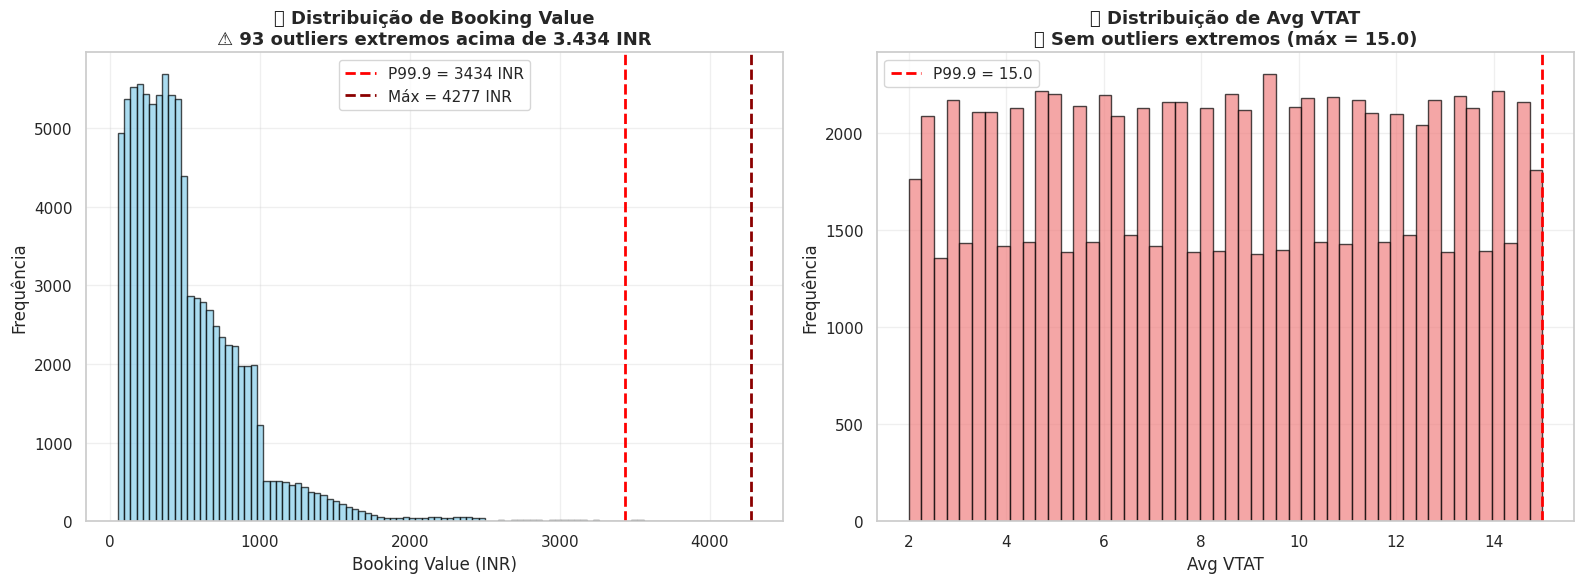


 CONCLUSÃO:
   • Booking Value: Identificados 93 registros extremos (>3.434 INR) que podem ser ERROS
     Razão valor/distância não condiz com a média do dataset
   • Avg VTAT: NENHUM outlier extremo identificado (máximo razoável de 15.0)

    RECOMENDAÇÃO: Remover apenas outliers de Booking Value acima do P99.9


In [62]:
# Visualização dos outliers extremos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Booking Value
ax1.hist(completed['Booking Value'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(p999, color='red', linestyle='--', linewidth=2, label=f'P99.9 = {p999:.0f} INR')
ax1.axvline(completed['Booking Value'].max(), color='darkred', linestyle='--', linewidth=2, label=f'Máx = {completed["Booking Value"].max():.0f} INR')
ax1.set_xlabel('Booking Value (INR)', fontsize=12)
ax1.set_ylabel('Frequência', fontsize=12)
ax1.set_title(' Distribuição de Booking Value\n 93 outliers extremos acima de 3.434 INR', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Avg VTAT
ax2.hist(completed['Avg VTAT'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(p999_vtat, color='red', linestyle='--', linewidth=2, label=f'P99.9 = {p999_vtat:.1f}')
ax2.set_xlabel('Avg VTAT', fontsize=12)
ax2.set_ylabel('Frequência', fontsize=12)
ax2.set_title(' Distribuição de Avg VTAT\n Sem outliers extremos (máx = 15.0)', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n CONCLUSÃO:")
print("   • Booking Value: Identificados 93 registros extremos (>3.434 INR) que podem ser ERROS")
print("     Razão valor/distância não condiz com a média do dataset")
print("   • Avg VTAT: NENHUM outlier extremo identificado (máximo razoável de 15.0)")
print("\n    RECOMENDAÇÃO: Remover apenas outliers de Booking Value acima do P99.9")